## Script for data exploration and analysis 

### 1. Data acquision


In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
crop_names = data['Name of the Crop'].unique() #Crop names
treatment_names = data['Treatment Name'].unique() #Treatment names
treatment_numbers = data['Treatment No.'].unique() #Treatment numbers
replication_numbers = data['Replication'].unique() #Replication numbers
data.head()


,Crop,Name of the Crop,Treatment No.,Treatment Name,Replication,Dry weight (in grams)
0,1,AdB,1,Control,1,NaN
1,2,Bar,1,Control,1,10.42
2,3,BlG,1,Control,1,10.46
3,4,Can,1,Control,1,10.08
4,5,Chi,1,Control,1,7.88


### 2. Data preprocessing


##### Plotting missing rows to see if there is any particular categorical variable that is missing

([<matplotlib.patches.Wedge at 0x7f53a42a46d8>,
 [Text(-0.9910657674599292, 0.4772720865178076, '1'),
  Text(0.24477311341532126, -1.0724206837565986, '2'),
  Text(0.860014529808899, 0.6858389085766268, '3')],
 [Text(-0.5405813277054159, 0.2603302290097132, '35.7%'),
  Text(0.13351260731744793, -0.5849567365945083, '35.7%'),
  Text(0.4690988344412176, 0.37409395013270547, '28.6%')])

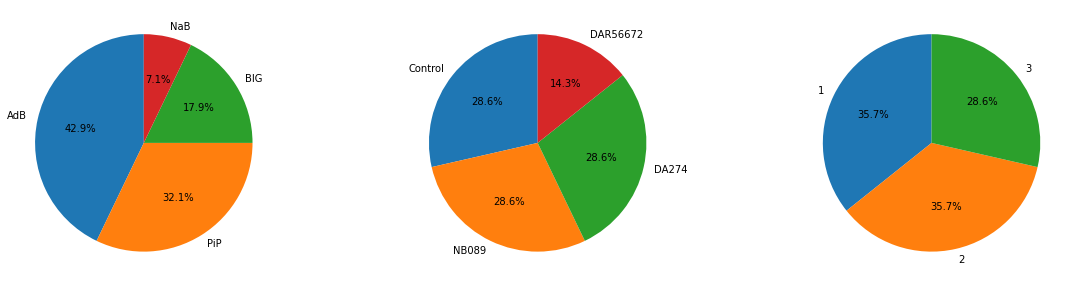

In [2]:
#Fetching rows where Dry Weight is NA
NAs = data[data['Dry weight (in grams)'].isna()]

#Plotting missing rows to see if there is any particular categorical variable that is missing
fig_1, (crop_name, treatment_names, replication_numbers) = plt.subplots(1,3, figsize=(20,5))
crop_name.pie(NAs['Name of the Crop'].value_counts(), labels = NAs['Name of the Crop'].unique(),startangle=90, autopct='%.1f%%')
treatment_names.pie(NAs['Treatment Name'].value_counts(), labels = NAs['Treatment Name'].unique(),startangle=90, autopct='%.1f%%')
replication_numbers.pie(NAs['Replication'].value_counts(), labels = NAs['Replication'].unique(),startangle=90, autopct='%.1f%%')


#### Removing Null rows

In [3]:
data_new = data.dropna() #Dropping rows where Dry Weight is NA

#### Outlier analysis

count    296.000000
mean       9.558581
std        2.556275
min        6.460000
25%        7.420000
50%        8.990000
75%       11.070000
max       17.340000
Name: Dry weight (in grams), dtype: float64

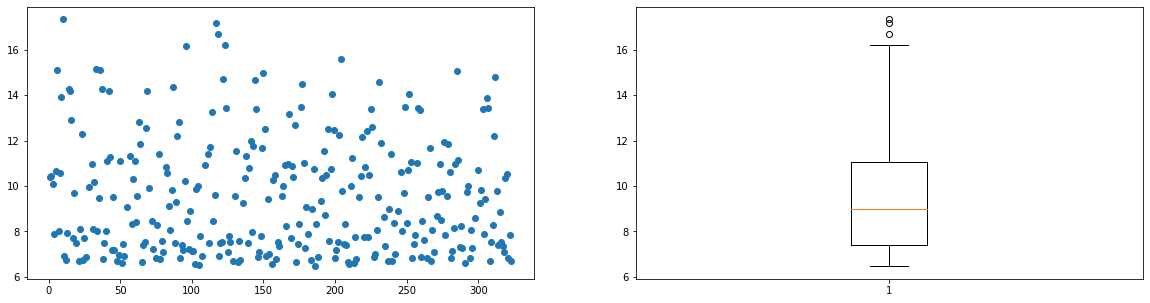

In [4]:
dry_wt =data_new['Dry weight (in grams)']
fig_2 , (scatter_plot, box_plot) = plt.subplots(1,2, figsize=(20,5))
scatter_plot.scatter(dry_wt.index, dry_wt) #Scatter plot to check for outliers
box_plot.boxplot(dry_wt) #Boxplot to check for outliers
data_new['Dry weight (in grams)'].describe() #Summary of Dry Weight

### 3. Data exploration and analysis


#### Exploring dry weight across different replication

#### For replication - 1 

In [11]:
#For replication-1
rep_1_data = data_new[data_new['Replication'] == 1] #Data for Replication 1
cond_1 = rep_1_data[rep_1_data['Treatment Name'] == 'Control'] #Data for Control
cond_2 = rep_1_data[rep_1_data['Treatment Name'] == 'NB089'] #Data for Treatment 1
cond_3 = rep_1_data[rep_1_data['Treatment Name'] == 'DAR56672'] #Data for Treatment 2
cond_4 = rep_1_data[rep_1_data['Treatment Name'] == 'DA274'] #Data for Treatment 3
stats_1_1 = cond_1['Dry weight (in grams)'].describe() #Summary of Control
stats_1_2 = cond_2['Dry weight (in grams)'].describe() #Summary of Treatment 1
stats_1_3 = cond_3['Dry weight (in grams)'].describe() #Summary of Treatment 2
stats_1_4 = cond_4['Dry weight (in grams)'].describe() #Summary of Treatment 3
stats_1 = pd.DataFrame([stats_1_1, stats_1_2, stats_1_3, stats_1_4]) #Summary of all treatments
stats_1.index = ['Control', 'Treatment 1', 'Treatment 2', 'Treatment 3'] #renaming rows of stats_1
stats_1

,count,mean,std,min,25%,50%,75%,max
Control,25.0,10.030400,3.097397,6.68,7.700,9.68,12.28,17.34
Treatment 1,24.0,9.571667,2.803525,6.62,7.180,8.79,11.10,15.16
Treatment 2,26.0,9.190769,2.496239,6.54,7.205,8.69,10.17,16.18
Treatment 3,23.0,9.334783,2.217781,6.64,7.460,8.48,11.22,14.18


<AxesSubplot:>

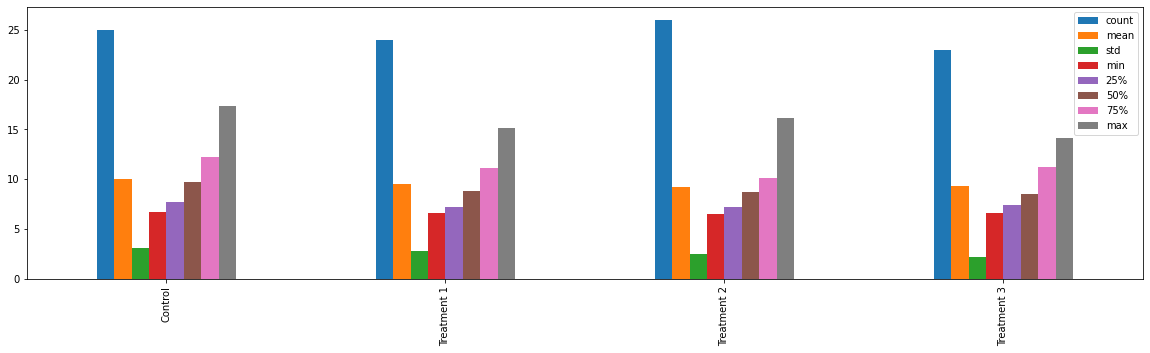

In [12]:
stats_1
stats_1.plot(kind='bar', figsize=(20,5)) #Bar plot of all treatments


#### For replication - 2

In [13]:
#For replication-2
rep_2_data = data_new[data_new['Replication'] == 2] #Data for Replication 2
cond_1 = rep_2_data[rep_2_data['Treatment Name'] == 'Control'] #Data for Control
cond_2 = rep_2_data[rep_2_data['Treatment Name'] == 'NB089'] #Data for Treatment 1
cond_3 = rep_2_data[rep_2_data['Treatment Name'] == 'DAR56672'] #Data for Treatment 2
cond_4 = rep_2_data[rep_2_data['Treatment Name'] == 'DA274'] #Data for Treatment 3
stats_2_1 = cond_1['Dry weight (in grams)'].describe() #Summary of Control
stats_2_2 = cond_2['Dry weight (in grams)'].describe() #Summary of Treatment 1
stats_2_3 = cond_3['Dry weight (in grams)'].describe() #Summary of Treatment 2
stats_2_4 = cond_4['Dry weight (in grams)'].describe() #Summary of Treatment 3
stats_2 = pd.DataFrame([stats_2_1, stats_2_2, stats_2_3, stats_2_4]) #Summary of all treatments
stats_2.index = ['Control', 'Treatment 1', 'Treatment 2', 'Treatment 3'] #renaming rows of stats_2
stats_2

,count,mean,std,min,25%,50%,75%,max
Control,24.0,10.176667,3.461810,6.66,7.495,9.00,12.125,17.16
Treatment 1,25.0,9.693600,2.599421,6.58,7.380,9.44,11.660,14.96
Treatment 2,26.0,9.453846,2.531926,6.56,7.430,9.03,11.100,15.60
Treatment 3,25.0,9.532800,2.300405,6.46,7.700,9.06,10.940,14.50


<AxesSubplot:>

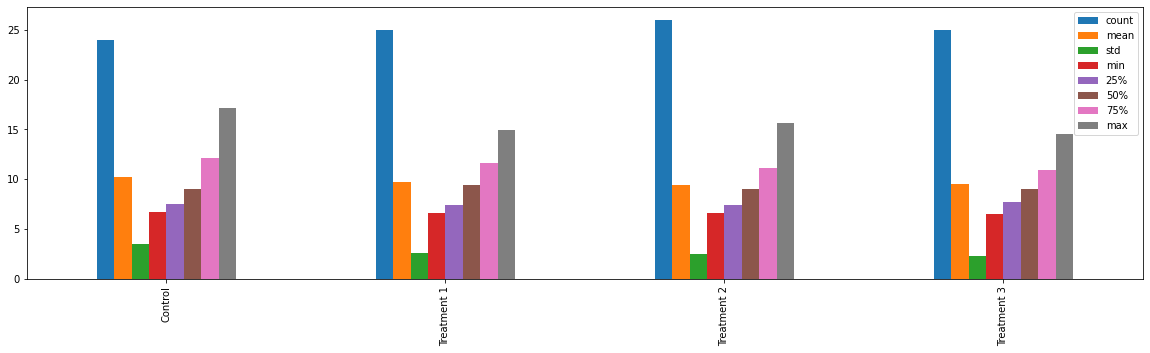

In [14]:
stats_2
stats_2.plot(kind='bar', figsize=(20,5)) #Bar plot of all treatments


#### For replication - 3

In [35]:
#For replication-3
rep_3_data = data_new[data_new['Replication'] == 3] #Data for Replication 2
cond_1 = rep_3_data[rep_3_data['Treatment Name'] == 'Control'] #Data for Control
cond_2 = rep_3_data[rep_3_data['Treatment Name'] == 'NB089'] #Data for Treatment 1
cond_3 = rep_3_data[rep_3_data['Treatment Name'] == 'DAR56672'] #Data for Treatment 2
cond_4 = rep_3_data[rep_3_data['Treatment Name'] == 'DA274'] #Data for Treatment 3
stats_3_1 = cond_1['Dry weight (in grams)'].describe() #Summary of Control
stats_3_2 = cond_2['Dry weight (in grams)'].describe() #Summary of Treatment 1
stats_3_3 = cond_3['Dry weight (in grams)'].describe() #Summary of Treatment 2
stats_3_4 = cond_4['Dry weight (in grams)'].describe() #Summary of Treatment 3
stats_3 = pd.DataFrame([stats_3_1, stats_3_2, stats_3_3, stats_3_4]) #Summary of all treatments
stats_3.index = ['Control', 'Treatment 1', 'Treatment 2', 'Treatment 3'] #renaming rows of stats_3
stats_3

,count,mean,std,min,25%,50%,75%,max
Control,24.0,9.600833,2.367060,6.68,7.65,9.25,11.535,14.58
Treatment 1,24.0,9.485000,2.391698,6.68,7.59,8.69,11.015,14.06
Treatment 2,25.0,9.449600,2.430597,6.70,7.52,8.84,10.540,14.80
Treatment 3,25.0,9.208000,2.058244,6.60,7.32,8.68,10.640,15.08


<AxesSubplot:>

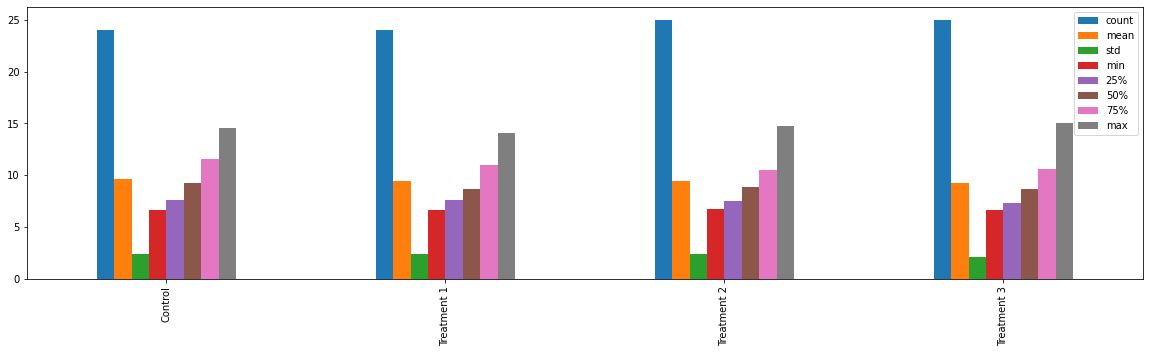

In [36]:
stats_3
stats_3.plot(kind='bar', figsize=(20,5)) #Bar plot of all treatments


#### Comparing mean of dry wt across replications

<AxesSubplot:>

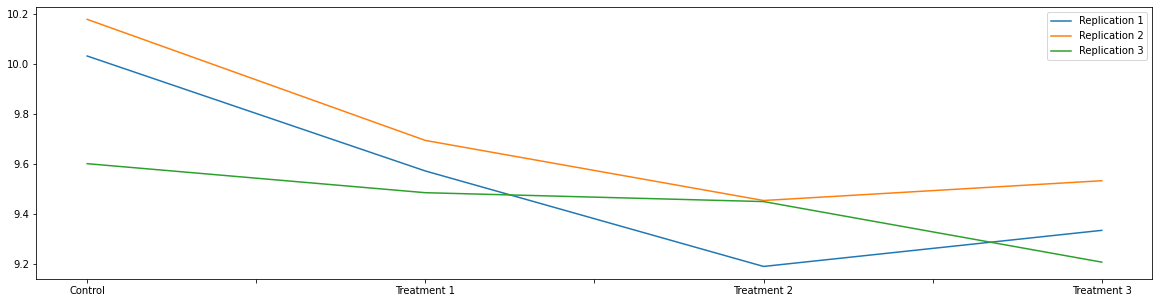

In [38]:
mean_compare = pd.concat([stats_1['mean'], stats_2['mean'], stats_3['mean']], axis=1) #Comparing means of all treatments
mean_compare.columns = ['Replication 1', 'Replication 2', 'Replication 3'] #Renaming columns of mean_compare
mean_compare
mean_compare.plot(kind='line', figsize=(20,5)) #Plotting mean_compare
 #Plotting mean_compare

#### Comparing crop name with treatment methods

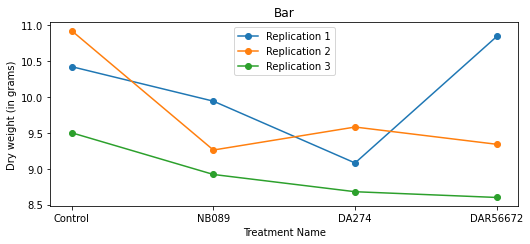

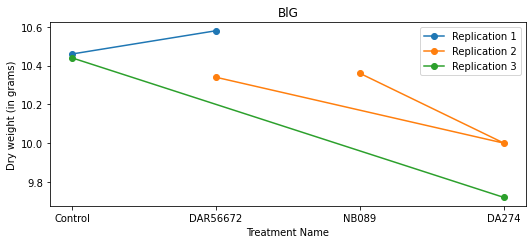

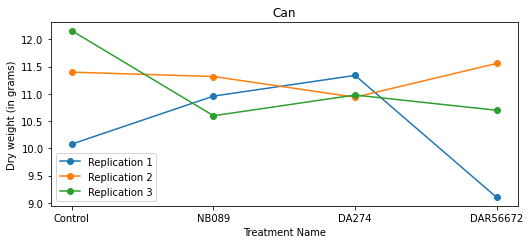

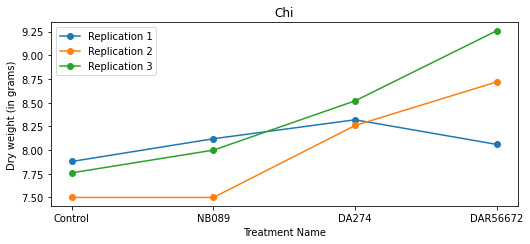

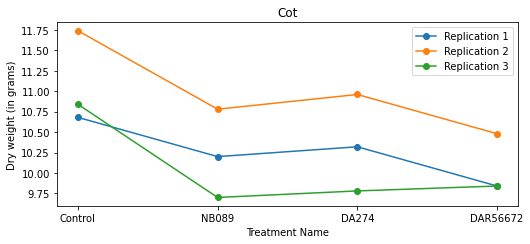

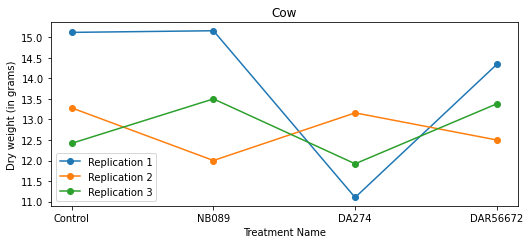

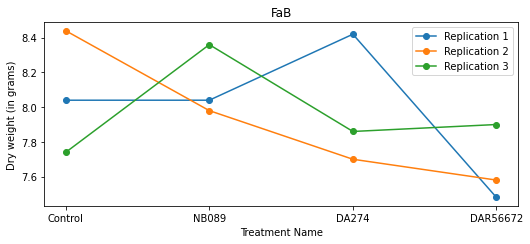

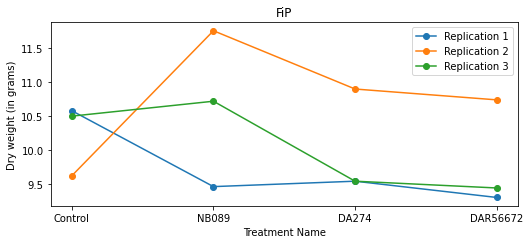

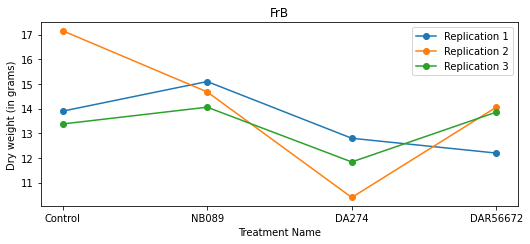

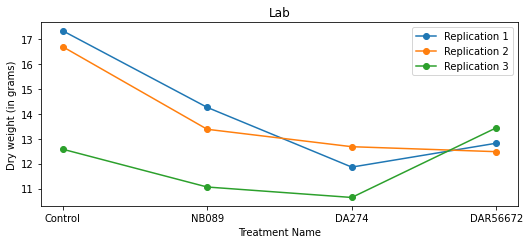

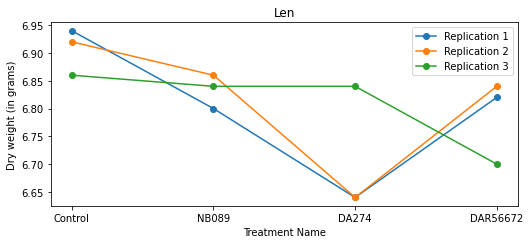

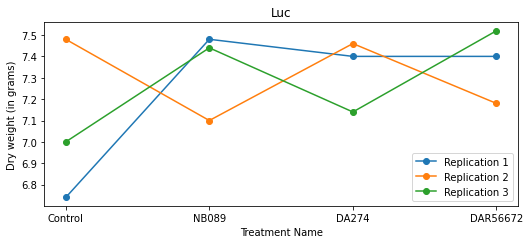

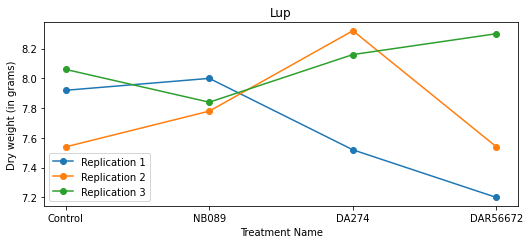

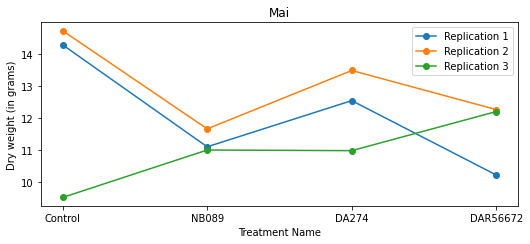

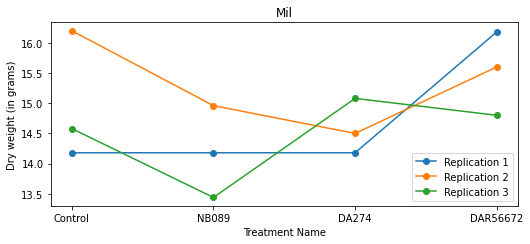

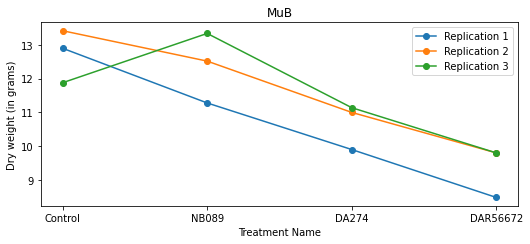

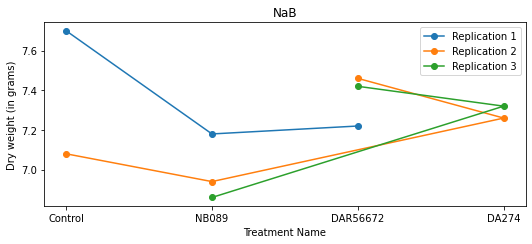

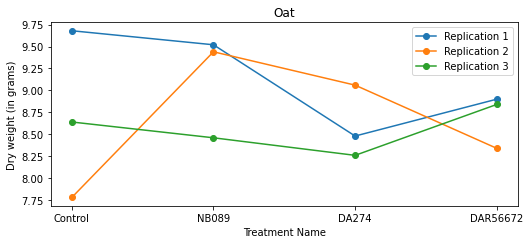

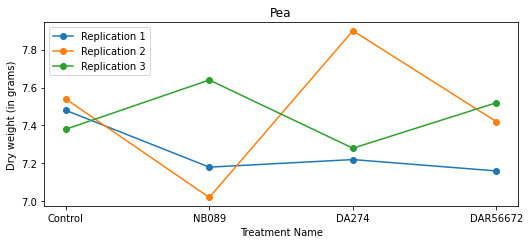

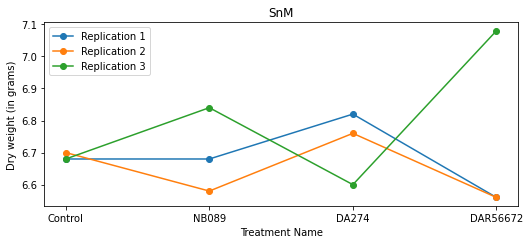

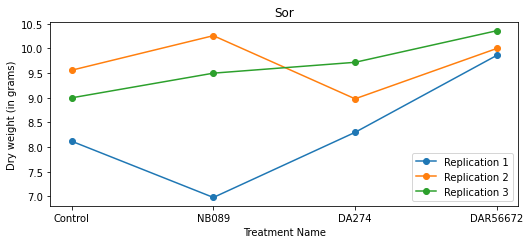

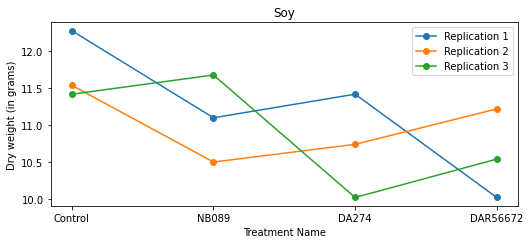

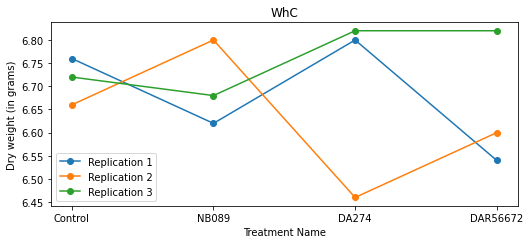

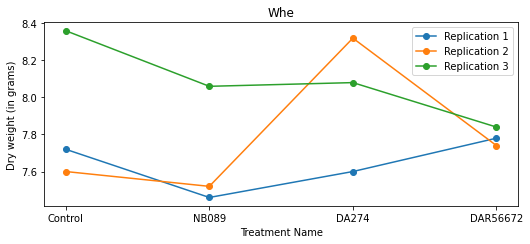

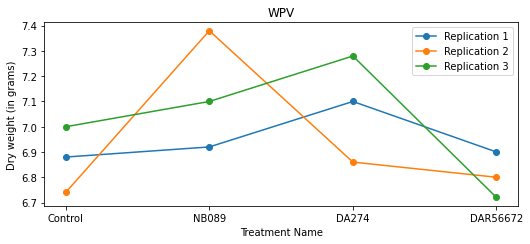

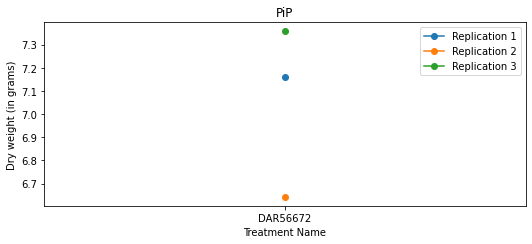

In [128]:
#Plotting all treatments for replication 1
crop_names = rep_1_data['Name of the Crop'].unique()
for crop in crop_names:
    group_1 = rep_1_data.groupby(['Name of the Crop'])
    group_2 = rep_2_data.groupby(['Name of the Crop'])
    group_3 = rep_3_data.groupby(['Name of the Crop'])
    group_crop_1 = group_1.get_group(crop)
    group_crop_2 = group_2.get_group(crop)
    group_crop_3 = group_3.get_group(crop)
    group_crop_1 = group_crop_1[['Treatment Name', 'Dry weight (in grams)']]
    group_crop_2 = group_crop_2[['Treatment Name', 'Dry weight (in grams)']]
    group_crop_3 = group_crop_3[['Treatment Name', 'Dry weight (in grams)']]
    plt.plot(group_crop_1['Treatment Name'], group_crop_1['Dry weight (in grams)'], 'o-')
    plt.plot(group_crop_2['Treatment Name'], group_crop_2['Dry weight (in grams)'], 'o-')
    plt.plot(group_crop_3['Treatment Name'], group_crop_3['Dry weight (in grams)'], 'o-')
    plt.xlabel('Treatment Name')
    plt.ylabel('Dry weight (in grams)')
    plt.title(crop)
    plt.legend(['Replication 1', 'Replication 2', 'Replication 3'])
    plt.show()
    

Thank you for using the script, please feel free to fork this GitHub repository.